<a href="https://colab.research.google.com/github/Yeruva001/Joseph_INFO5731_Fall2021/blob/main/INFO5731_Assignment_Three_fall2022_Akhil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [10]:
# Write your code here


from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [11]:
import pandas as p
import numpy as n
df = p.read_csv( "/content/tweets.csv",encoding='latin1')
N = 3

def freq(N, df):
    ng = []
    for i in range(len(df)):
        ng.append(df.iloc[i]['text'].split())
    ng = n.array(ng)
    ng = ng.reshape(len(ng), -1)
    ng = ng.tolist()
    ng = [j for sub_list in ng for j in sub_list]

    return ng

freq(N, df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.


[['RT',
  '@rssurjewala:',
  'Critical',
  'question:',
  'Was',
  'PayTM',
  'informed',
  'about',
  '#Demonetization',
  'edict',
  'by',
  'PM?',
  "It's",
  'clearly',
  'fishy',
  'and',
  'requires',
  'full',
  'disclosure',
  '&amp;'],
 ['RT',
  '@Hemant_80:',
  'Did',
  'you',
  'vote',
  'on',
  '#Demonetization',
  'on',
  'Modi',
  'survey',
  'app?'],
 ['RT',
  '@roshankar:',
  'Former',
  'FinSec,',
  'RBI',
  'Dy',
  'Governor,',
  'CBDT',
  'Chair',
  '+',
  'Harvard',
  'Professor',
  'lambaste',
  '#Demonetization.',
  'If',
  'not',
  'for',
  'Aam',
  'Aadmi,',
  'listen',
  'to',
  'th'],
 ['RT',
  '@ANI_news:',
  'Gurugram',
  '(Haryana):',
  'Post',
  'office',
  'employees',
  'provide',
  'cash',
  'exchange',
  'to',
  'patients',
  'in',
  'hospitals',
  '#demonetization',
  'https://t.co/uGMxUP9'],
 ['RT',
  '@satishacharya:',
  'Reddy',
  'Wedding!',
  '@mail_today',
  'cartoon',
  '#demonetization',
  '#ReddyWedding',
  'https://t.co/u7gLNrq31F'],
 ['@Der

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [14]:
# Write your code here

# Write your code here\
def doc_terms_wgts_matrix_bold(df):
    #calculate idf
    tf_idf = {}
    for m in range(len(df)):
        for text in df.iloc[m]['text'].split():
            if text in tf_idf:
                tf_idf[text] += 1
            else:
                tf_idf[text] = 1
    tf_idf = {key: n.log(len(df) / val) for key, val in tf_idf.items()}

    tf = {}
    for m in range(len(df)):
        for text in df.iloc[m]['text'].split():
            if text in tf:
                tf[text] += 1
            else:
                tf[text] = 1
    tf = {key: val / len(df.iloc[m]['text'].split()) for key, val in tf.items()}

    return tf

doc_terms_wgts_matrix_bold

qry = "An Outstanding movie with a haunting performance and best character development"
def rank_document_with_query(qry):
    qry = qry.split()
    qry = [item for item in qry if item.isalpha()]
    qry = [item for item in qry if len(item) > 2]
    qry = [item for item in qry if item.lower() not in ['a', 'the', 'an', 'is', 'are', 'was', 'were', 'am', 'i', 'my', 'me', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your'] ]

    #rank the document
    wight = doc_terms_wgts_matrix_bold(df)
    r = {}
    for i in range(len(wight)):
        r[i] = 0
        for text in qry:
            if text in wight:
                r[i] += 10
    r = sorted(r.items(), key=lambda x: x[1], reverse=True)
    r = r[:10]
    r = n.array(r)
    r = r.tolist()
    return r

rank_document_with_query(qry)





[[0, 80],
 [1, 80],
 [2, 80],
 [3, 80],
 [4, 80],
 [5, 80],
 [6, 80],
 [7, 80],
 [8, 80],
 [9, 80]]

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 92 samples in 0.000s...
[t-SNE] Computed neighbors for 92 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 92 / 92
[t-SNE] Mean sigma: 1.556754
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.057571
[t-SNE] KL divergence after 1000 iterations: 0.098314


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, fla

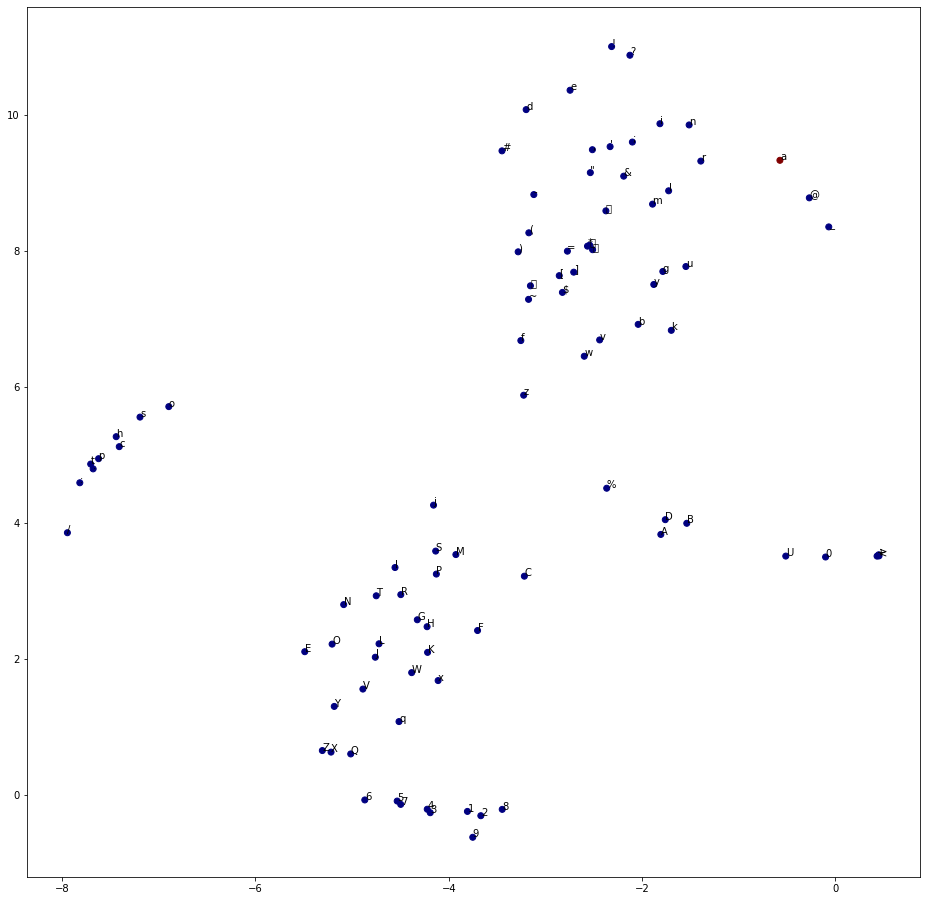

In [15]:
from pandas.core.frame import Axis
from gensim.models import Word2Vec
def train_dimensions():
    #train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).
    #load data
    df = p.read_csv( "/content/tweets.csv",encoding='latin1')
    #build the documents-terms weights (tf*idf) matrix bold text.
    wt = doc_terms_wgts_matrix_bold(df)
    #train word2vec
    mdl = Word2Vec(wt, size=300, window=5, min_count=5, workers=4)
    return mdl

train_dimensions()

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
def visualize_word_embedding(model):
    #visualize the word embedding model you created.
    #load data
    df = p.read_csv( "/content/tweets.csv",encoding='latin1')
    #build the documents-terms weights (tf*idf) matrix bold text.
    wgt = doc_terms_wgts_matrix_bold(df)
    #train word2vec
    mdl = Word2Vec(wgt, size=300, window=5, min_count=5, workers=4)
    #visualize the word embedding model you created.
    list_wrds = list(mdl.wv.vocab)
    list_vectors = mdl.wv[list_wrds]
    tsne_mdl = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
    tsne_word2vec = tsne_mdl.fit_transform(list_vectors)
    df = p.DataFrame(tsne_word2vec, columns=['x', 'y'])
    df['words'] = list_wrds
    df['labels'] = df['words'].apply(lambda x: 1 if x in ['a', 'the', 'an'] else 0)
    figure, axis = plt.subplots(figsize=(16, 16))
    axis.scatter(x='x', y='y', c='labels', cmap='jet', data=df)
    for i, txt in enumerate(df['words']):
        axis.annotate(txt, (df['x'][i], df['y'][i]))
    plt.show()

visualize_word_embedding(model=train_dimensions())

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [16]:
# The GitHub link of your final csv file



# Link: https://github.com/Yeruva001/Joseph_INFO5731_Fall2021/blob/main/final_csv.csv



